In [3]:
import pandas as pd

df_lung = pd.read_csv("D:/Sem 3/ML project/survey lung cancer.csv", encoding='utf-8')
print(df_lung.shape)

print(df_lung.info())
print(df_lung.head())


(309, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC_DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL_CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS_OF_BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST_PAIN             309 non-null    int64 
 15  LUNG_CANCER  

In [4]:
print(df_lung['LUNG_CANCER'].unique())


['YES' 'NO']


In [5]:
print(df_lung.dtypes)  
print(df_lung['LUNG_CANCER'].unique())  

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC_DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL_CONSUMING         int64
COUGHING                  int64
SHORTNESS_OF_BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST_PAIN                int64
LUNG_CANCER              object
dtype: object
['YES' 'NO']


In [7]:
print(df_lung['LUNG_CANCER'].isna().sum()) 
print(df_lung.shape)  


0
(309, 16)


Preprocessing of Dataset

In [6]:
from sklearn.preprocessing import LabelEncoder

df_lung = df_lung.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'O' else col)

print(df_lung.head())


   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   
3       1   63        2               2        2              1   
4       0   63        1               2        1              1   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                1        2        1         2                  2         2   
1                2        2        2         1                  1         1   
2                1        2        1         2                  1         2   
3                1        1        1         1                  2         1   
4                1        1        1         2                  1         2   

   SHORTNESS_OF_BREATH  SWALLOWING DIFFICULTY  CHEST_PAIN  LUNG_CANCER  
0                    2                      2    

Visualisation using Seaborn And Matplotlib

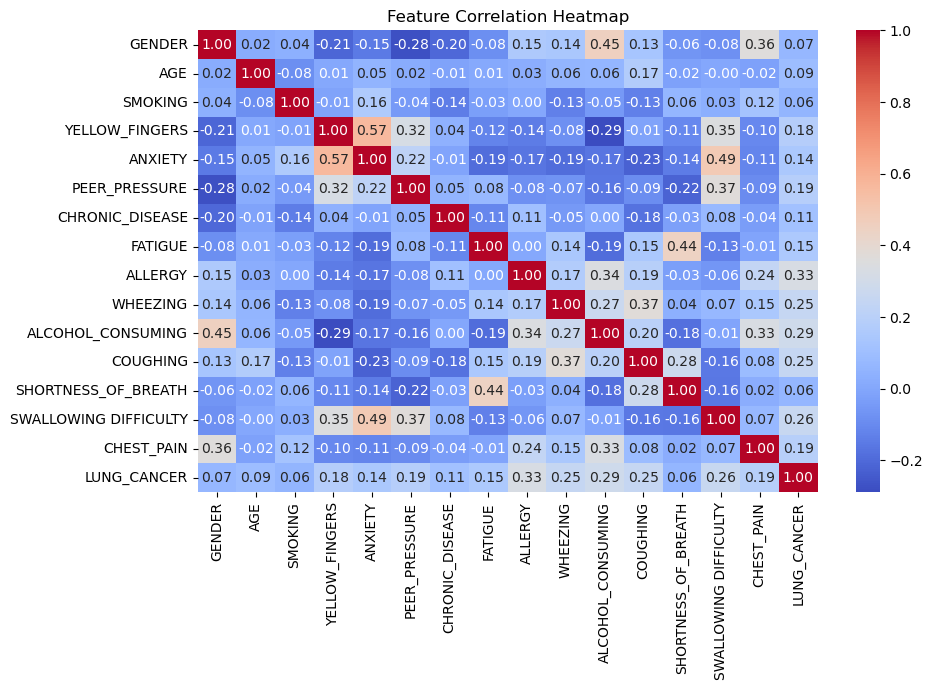

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_lung.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


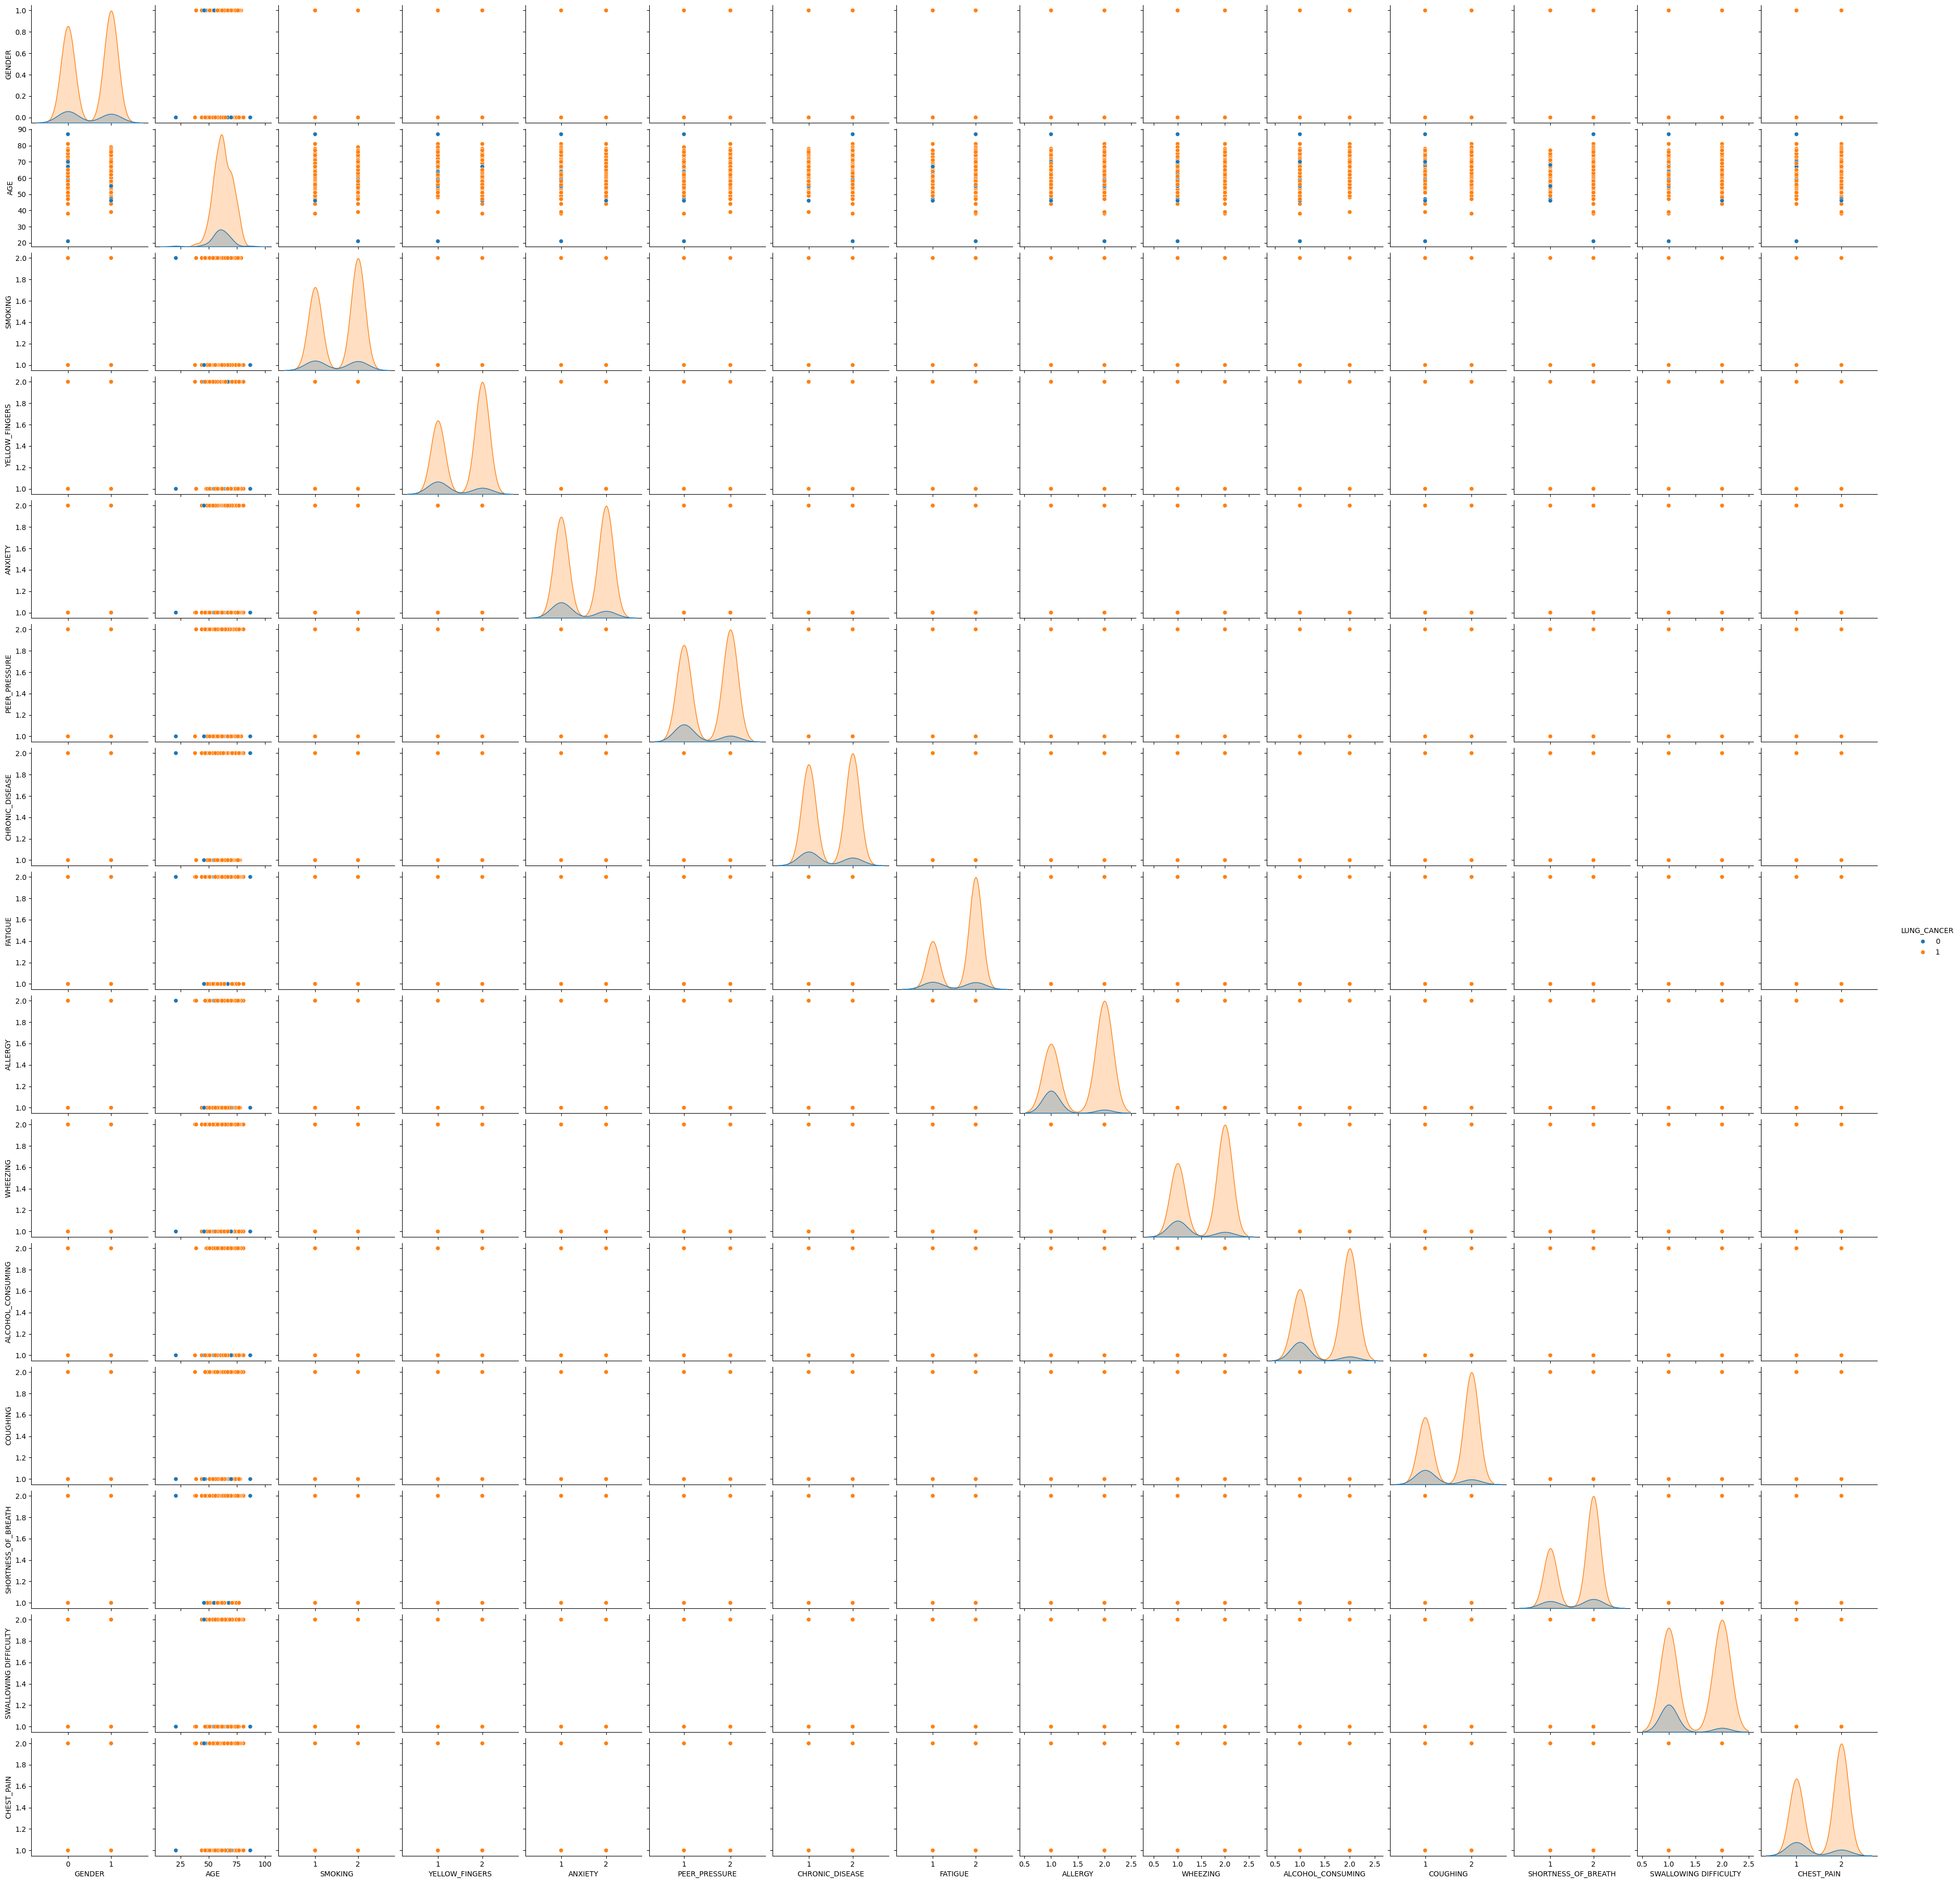

In [9]:
sns.pairplot(df_lung, hue="LUNG_CANCER")
plt.show()


Bayesian Network For Cancer Detection

In [10]:
from pgmpy.models import BayesianNetwork

In [11]:
model = BayesianNetwork([
    ("SMOKING", "LUNG_CANCER"),
    ("ALCOHOL_CONSUMING", "LUNG_CANCER"), 
    ("AGE", "LUNG_CANCER"),
    ("COUGHING", "LUNG_CANCER"),
    ("SHORTNESS_OF_BREATH", "LUNG_CANCER"),
    ("CHEST_PAIN", "LUNG_CANCER"),
    ("FATIGUE", "LUNG_CANCER")
])


In [12]:
from pgmpy.estimators import MaximumLikelihoodEstimator


In [13]:
model.fit(df_lung, estimator=MaximumLikelihoodEstimator)


Model Training for Bayesian Network

In [15]:
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

model.fit(df_lung, estimator=MaximumLikelihoodEstimator)

inference = VariableElimination(model)

print("Bayesian Network Model Trained Successfully!")


Bayesian Network Model Trained Successfully!
